In [1]:
import tensorflow as tf

# This one line downloads the dataset and splits it for you
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print(f"Training images: {X_train.shape}") # Should show (60000, 28, 28)
print(f"Testing images: {X_test.shape}")   # Should show (10000, 28, 28)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training images: (60000, 28, 28)
Testing images: (10000, 28, 28)


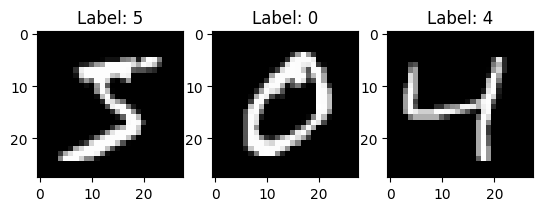

In [2]:
import matplotlib.pyplot as plt

# Let's look at the first 3 images
plt.subplot(1, 3, 1); plt.imshow(X_train[0], cmap='gray'); plt.title(f"Label: {y_train[0]}")
plt.subplot(1, 3, 2); plt.imshow(X_train[1], cmap='gray'); plt.title(f"Label: {y_train[1]}")
plt.subplot(1, 3, 3); plt.imshow(X_train[2], cmap='gray'); plt.title(f"Label: {y_train[2]}")
plt.show()


In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Print the "Shape" of the data to confirm it loaded correctly
print(f"Training images: {X_train.shape}") # Should be (60000, 28, 28)
print(f"Testing images: {X_test.shape}")   # Should be (10000, 28, 28)
print("Data loaded successfully!")


Training images: (60000, 28, 28)
Testing images: (10000, 28, 28)
Data loaded successfully!


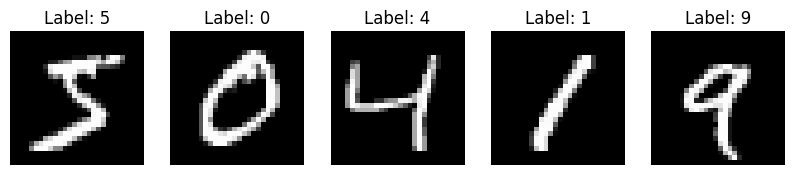

In [4]:
import matplotlib.pyplot as plt

# Create a figure to display the first 5 digits
plt.figure(figsize=(10, 2))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train[i], cmap='gray') # 'gray' because MNIST is black and white
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off') # Hide the x/y coordinates for a cleaner look

plt.show()

In [5]:
# 1. Normalize the pixel values (Scale from 0-255 to 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# 2. Reshape the data
# For a CNN, we need to add a '1' at the end to represent the grayscale channel
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print("Data normalized and reshaped!")
print(f"New Shape: {X_train.shape}")

Data normalized and reshaped!
New Shape: (60000, 28, 28, 1)


In [6]:
from tensorflow.keras import layers, models

model = models.Sequential([
    # First layer: Convolutional layer to 'see' patterns (lines/edges)
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Second layer: Flatten the 2D image into a 1D vector
    layers.Flatten(),

    # Third layer: A 'Dense' layer with 128 neurons to make decisions
    layers.Dense(128, activation='relu'),

    # Final layer: 10 neurons (one for each digit 0-9)
    # 'softmax' converts the output into probabilities
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# We will train for 5 'epochs' (meaning the model sees the entire dataset 5 times)
# validation_split takes 10% of your data to check accuracy while training
history = model.fit(X_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 20ms/step - accuracy: 0.9069 - loss: 0.3147 - val_accuracy: 0.9842 - val_loss: 0.0559
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.9824 - loss: 0.0561 - val_accuracy: 0.9850 - val_loss: 0.0552
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.9897 - loss: 0.0333 - val_accuracy: 0.9850 - val_loss: 0.0568
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.9930 - loss: 0.0229 - val_accuracy: 0.9877 - val_loss: 0.0510
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.9954 - loss: 0.0139 - val_accuracy: 0.9862 - val_loss: 0.0537


In [8]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9835 - loss: 0.0571

Test Accuracy: 98.63%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


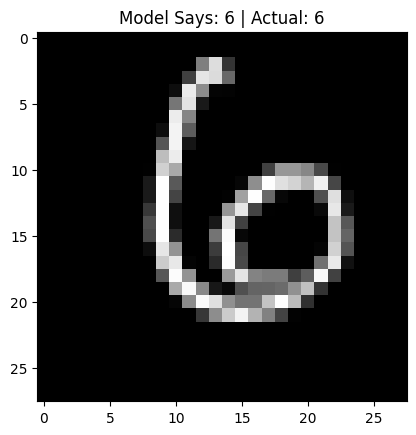

In [9]:
import numpy as np

# Pick image #100 from the test set
image_index = 100
plt.imshow(X_test[image_index].reshape(28, 28), cmap='gray')

# Model prediction
prediction = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
predicted_label = np.argmax(prediction)

plt.title(f"Model Says: {predicted_label} | Actual: {y_test[image_index]}")
plt.show()

In [10]:
model.save('mnist_model.h5')
print("Model saved as mnist_model.h5! You can find it in the folder icon on the left of Colab.")

Model saved as mnist_model.h5! You can find it in the folder icon on the left of Colab.
